### 주가지수의 이해

주가지수의 ‘지수’(index)란 상품의 값이나 수량이 일정 기간 동안 얼마나 달라졌는지 측정해 비교할 목적으로 만들어 쓰는 통계 값이다. 지수를 만들기 위해 흔히 쓰는 방법은, 기준시점 값을 100으로 놓고 비교하려는 시점 값이 기준 값에 비해 얼마나 큰지 구하는 것이다. 주가지수도 같은 방식으로 만든다. 지난해에 100원이던 주가가 올해 120원이라면 지난해 기준으로 올해 주가지수는 120이다. 단위는 포인트(P). 곧 120포인트다.


주가지수는 주가가 어떻게 변하는지 쉽게 나타낸다. 종목별로 만들어 쓸 수도 있지만 여러 종목의 주가 변동을 종합한 종합주가지수를 만들면 업종이나 규모별 혹은 그 밖의 다양한 범주로 여러 종목의 시세 흐름을 묶어 알기 쉽게 나타낼 수 있다.

In [1]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt
import seaborn as sns
import pandas_datareader as web

In [2]:
import datetime

start = datetime.datetime(2020, 1, 1)
end = datetime.datetime(2023, 5, 31)
df_null = web.DataReader("KOSPI", "naver", start, end)
df = df_null['Close'].dropna().astype('float')

<AxesSubplot:xlabel='Date'>

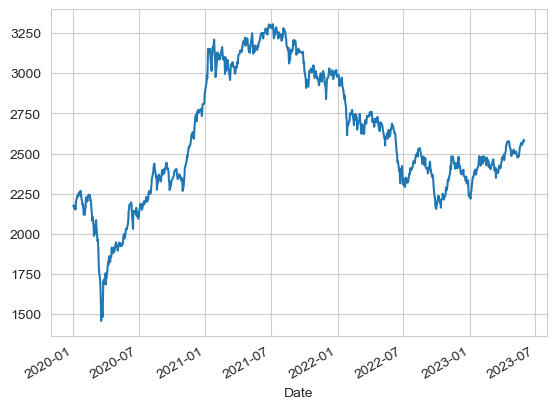

In [3]:
df.plot()

#### 주가지수의 제작

주가지수의 제작은 다음과 같이 크게 네 가지 방법이 존재한다

**1. 산술평균지수**

시장가를 단순히 더하여 지수를 계산한다. 기업의 재무적 활동이나 시장 상황에 불안정한 모습을 보이기 때문에 잘 사용되지 않는다.

대표적으로 다우존스와 닛케이 지수가 있다. 코스피는 1964년부터 1982년까지 산술평균지수를 사용하였다

In [4]:
ticker = ['005930','000660','207940','051910','006400','005380','000270','035420','005490']
Data = pd.DataFrame()
for i in ticker :
    df_null = web.DataReader(i, "naver", start, end)
    df = df_null['Close'].dropna().astype('float')
    df.columns = [i]
    Data = pd.concat([Data, df], axis = 1)

Data.columns = ticker

In [5]:
Data

,005930,000660,207940,051910,006400,005380,000270,035420,005490
2020-01-02,55200.0,94700.0,423485.0,314000.0,232000.0,118000.0,42500.0,182500.0,236000.0
2020-01-03,55500.0,94500.0,417061.0,311000.0,229000.0,116000.0,42000.0,181500.0,237000.0
2020-01-06,55500.0,94300.0,407178.0,307000.0,230000.0,116000.0,41900.0,180500.0,231000.0
2020-01-07,55800.0,94000.0,414096.0,311000.0,231500.0,115500.0,42050.0,187000.0,232000.0
2020-01-08,56800.0,97400.0,403719.0,302000.0,229000.0,112000.0,41300.0,183000.0,228000.0
...,...,...,...,...,...,...,...,...,...
2023-05-24,68500.0,97700.0,792000.0,720000.0,714000.0,207500.0,89100.0,203000.0,371000.0
2023-05-25,68800.0,103500.0,779000.0,712000.0,700000.0,203500.0,87100.0,206000.0,365000.0
2023-05-26,70300.0,109200.0,777000.0,706000.0,693000.0,205500.0,87400.0,202500.0,360500.0
2023-05-30,72300.0,110300.0,778000.0,702000.0,718000.0,200500.0,85600.0,201500.0,363000.0


In [6]:
Data['sum'] = Data.sum(axis = 1)
Data

,005930,000660,207940,051910,006400,005380,000270,035420,005490,sum
2020-01-02,55200.0,94700.0,423485.0,314000.0,232000.0,118000.0,42500.0,182500.0,236000.0,1698385.0
2020-01-03,55500.0,94500.0,417061.0,311000.0,229000.0,116000.0,42000.0,181500.0,237000.0,1683561.0
2020-01-06,55500.0,94300.0,407178.0,307000.0,230000.0,116000.0,41900.0,180500.0,231000.0,1663378.0
2020-01-07,55800.0,94000.0,414096.0,311000.0,231500.0,115500.0,42050.0,187000.0,232000.0,1682946.0
2020-01-08,56800.0,97400.0,403719.0,302000.0,229000.0,112000.0,41300.0,183000.0,228000.0,1653219.0
...,...,...,...,...,...,...,...,...,...,...
2023-05-24,68500.0,97700.0,792000.0,720000.0,714000.0,207500.0,89100.0,203000.0,371000.0,3262800.0
2023-05-25,68800.0,103500.0,779000.0,712000.0,700000.0,203500.0,87100.0,206000.0,365000.0,3224900.0
2023-05-26,70300.0,109200.0,777000.0,706000.0,693000.0,205500.0,87400.0,202500.0,360500.0,3211400.0
2023-05-30,72300.0,110300.0,778000.0,702000.0,718000.0,200500.0,85600.0,201500.0,363000.0,3231200.0


In [7]:
Data['index'] = Data['sum'] / Data['sum'][0] * 100

<AxesSubplot:>

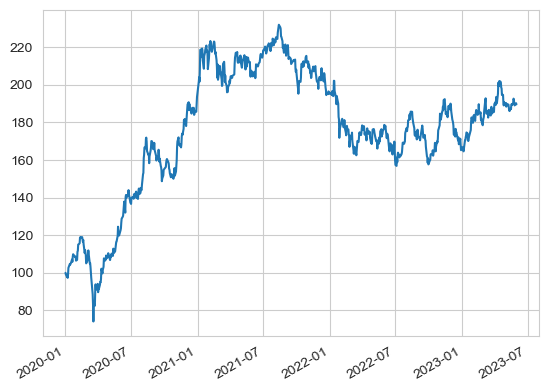

In [8]:
Data['index'].plot()

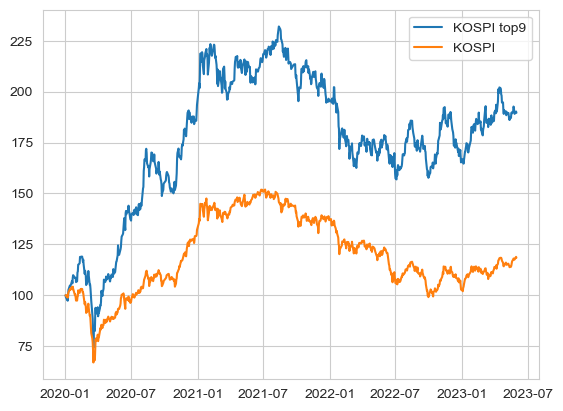

In [9]:
df_null = web.DataReader("KOSPI", "naver", start, end)
df = df_null['Close'].dropna().astype('float')

plt.plot(Data['index'], label = 'KOSPI top9')
plt.plot(df / df[0] * 100, label = 'KOSPI')
plt.legend(); plt.show()

**2. 시가총액 가중지수**

산술평균 지수의 단점을 보완하고, 기업의 재무활동(유상증자, 배당지급 등)에 영향을 받지 않는다는 장점이 있다. 단, 편입 편출에 따라서 계산이 복잡해진다는 단점, 시가총액이 큰 대형주에 주가지수가 쉽게 끌려간다는 점이다. 하지만 덕분에 경기상황을 가장 잘 보여주기도 한다.

In [10]:
cap = [329531996760000, 68941823965500, 28351702500000, 22165995702000, 15953370960000, 25212846066000, 17227942247500, 30078444587500, 20576093060000]

In [11]:
(cap*Data.iloc[1,:9]).sum()

6.1159399660336505e+19

$$\mbox{index} = \frac{\mbox{Market Cap}}{\mbox{Market Cap of initial points}} \cdot 100$$

시가총액의 데이터가 필요하다

**3. 등액가중 주가지수**

- 편입된 회사에 똑같은 금액을 투자한 포트폴리오의 실제수익률을 기준으로 한 주가지수
- 종목교체 이외의 모든 이슈를 상쇄할 수 있다. 즉 현금배당, 스톡옵션, 증자, 감자 등에 대한 이슈를 견딜 수 있다
- 실제 수익률을 기반으로 산출하므로 주식투자를 하는 투자자들한테 보여주는 정보의 정밀도가 굉장히 높다
<br>

- 산출방식이 매우 복잡하고, 사람들이 투자할 때 펀더멘탈이 다른 여러 종목에 똑같은 금액을 투자한다는 가정이 비현실적이기 때문에 현실적으로 사용하는 지수가 적다
- 보통 자산운용의 성과를 보일 때 많이 사용된다

In [12]:
weight = 1000000 / Data.iloc[1, :9]
Data['weight_sum'] = (weight * Data.iloc[:,:9]).sum(axis = 1)

In [13]:
Data['weight_index'] = Data['weight_sum'] / Data['weight_sum'][0] * 100
Data['weight_index']

2020-01-02    100.000000
2020-01-03     99.279702
2020-01-06     98.534937
2020-01-07     99.390104
2020-01-08     98.312521
                 ...    
2023-05-24    178.639437
2023-05-25    177.071506
2023-05-26    177.278911
2023-05-30    178.001014
2023-05-31    177.233217
Name: weight_index, Length: 844, dtype: float64

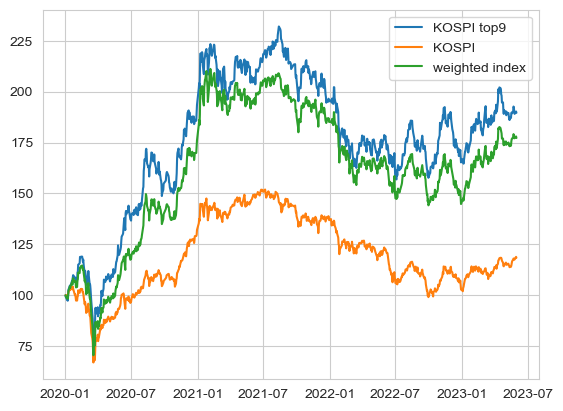

In [14]:
df_null = web.DataReader("KOSPI", "naver", start, end)
df = df_null['Close'].dropna().astype('float')

plt.plot(Data['index'], label = 'KOSPI top9')
plt.plot(df / df[0] * 100, label = 'KOSPI')
plt.plot(Data['weight_index'], label = 'weighted index')
plt.legend();
plt.show()

#### 어떤 요소를 넣어야 하는가?

- 지수는 말 그래도 시장의 상황을 가장 잘 포착해야 한다. 벤치마크 혹은 목표로 하는 상황에서 3%이상 차이가 나면 지수로써의 의미는 퇴색된다. 따라서, 시장상황에 강건한 지수를 만드는 것이 가장 최우선이다.
- ETF는 지수의 예 중 하나이다
- 산업직군, 팩터를 나누어 지수를 계산하면 그 직군 혹은 시스템 리스크를 보여주는 하나의 지표가 된다.
- 대체 데이터를 사용하여 지수를 제작할 수도 있다. 대표적으로 매일경제 - QRAFT의 붐&쇼크지수가 있다.

#### 어떤 점을 중요로 해야 하는가?

**1. 대표성**

지수의 가장 큰 의의는 시장을 대표한다는 것이다. 소수의 데이터만으로 시장 전체를 대표한다는 것은 어려운 일이므로, 주기적으로 모니터링이 필요하다

**2. 상대적 거리**

전체적인 추세 속에서 상대적인 값이 더 중요할 경우, 이때 스케일의 변화를 줄 때에 상대적 수치의 의미가 퇴색되는지 검토해야 한다. 자료가 서수적 특징을 가지는지, 단순 크기 차이나 비율에 의미가 있는지 자료의 의미를 제대로 파악해야 한다.

**3. 불변성**

시장지수는 무엇보다 신뢰성이 있어야 이용자들이 믿고 쓸 것이다. 구성요소가 작은 충격에도 바뀐다면 아무도 신뢰하지 않을 것이다. 따라서, 오랜 기간 동안 사용해도 될만한 신뢰성 있는 데이터를 사용해야 한다